In [ ]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import cv2
import math
from scipy import ndimage
import torch
import torch.nn as nn
from google.colab import files


import keras.datasets as ds
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D, ReLU, Flatten, Dense, Dropout
import keras
import numpy as np
import pandas as pd
from keras.models import load_model
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import cv2
import math
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np



## Network Architecture:
- 32 x 3 x 3 CONV
- 64 x 3 x 3 CONV
- 2 x 2 MAX POOL
- 128 FC
- DROPOUT (%50)
- 10 FC


In [ ]:
# Model / data parameters

num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 46s 106ms/step - loss: 0.3457 - accuracy: 0.8941 - val_loss: 0.0764 - val_accuracy: 0.9793
Epoch 2/15
422/422 [==============================] - 43s 101ms/step - loss: 0.1062 - accuracy: 0.9673 - val_loss: 0.0585 - val_accuracy: 0.9838
Epoch 3/15
422/422 [==============================] - 42s 98ms/step - loss: 0.0797 - accuracy: 0.9753 - val_loss: 0.0472 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0674 - accuracy: 0.9791 - val_loss: 0.0437 - val_accuracy: 0.9860
Epoch 5/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0601 - accuracy: 0.9807 - val_loss: 0.0406 - val_accuracy: 0.9883
Epoch 6/15
422/422 [==============================] - 44s 104ms/step - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0364 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 42s 100ms/step - loss: 0.0510 - accuracy: 0.9839 - val_loss: 0.0340 - val_accur

In [ ]:

model.save('CNNwithMNİST.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Download model
files.download('CNNwithMNİST.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Loading a pre-trained Keras model
model=keras.models.load_model('CNNwithMNİST.h5')
# Evaluating the model performance on the test dataset
score = model.evaluate(x_test, y_test, verbose=0)
# Printing the test loss and accuracy
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022670915350317955
Test accuracy: 0.9919999837875366


313/313 [==============================] - 7s 20ms/step


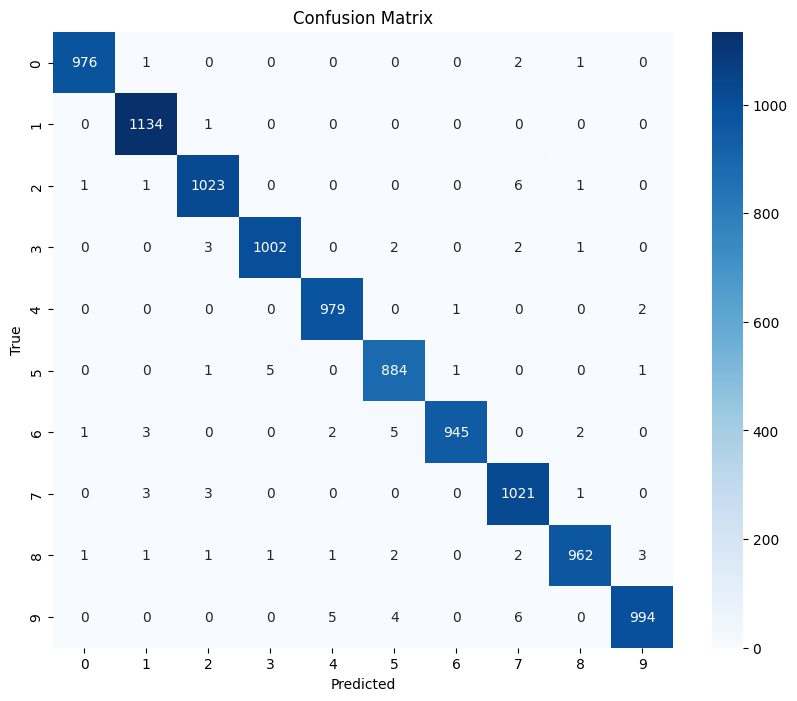

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test data set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
def getBestShift(img):
     # Compute the center of mass of the image
    cy, cx = ndimage.center_of_mass(img)
    # Get the number of rows and columns in the image
    rows, cols = img.shape
    # Compute the shift necessary to center the image
    shiftx = np.round(cols / 2.0 - cx).astype(int)
    shifty = np.round(rows / 2.0 - cy).astype(int)

    return shiftx, shifty


def shift(img, sx, sy):
    # Shift the image by (sx, sy) using an affine transformation
    rows, cols = img.shape
    M = np.float32([[1, 0, sx], [0, 1, sy]])
    shifted = cv2.warpAffine(img, M, (cols, rows))
    return shifted

# Create arrays to store images and their corresponding correct values
images = np.zeros((4,28,28))
correct_vals = np.zeros((4,10))

# Iterate over the images
i = 0
for no in [8,0,4,3]:
    # read the image
    gray = cv2.imread("/content/drive/MyDrive/resim/"+str(no)+".png", cv2.IMREAD_GRAYSCALE)

    # resize the images and invert it (black background)
    gray = cv2.resize(255-gray, (28, 28))
    (thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Remove excess padding from the image
    while np.sum(gray[0]) == 0:
      gray = gray[1:]

    while np.sum(gray[:,0]) == 0:
      gray = np.delete(gray,0,1)

    while np.sum(gray[-1]) == 0:
      gray = gray[:-1]

    while np.sum(gray[:,-1]) == 0:
      gray = np.delete(gray,-1,1)

    rows,cols = gray.shape

    # Resize the image to fit into a 28x28 square
    if rows > cols:
      factor = 20.0/rows
      rows = 20
      cols = int(round(cols*factor))
      gray = cv2.resize(gray, (cols,rows))
    else:
      factor = 20.0/cols
      cols = 20
      rows = int(round(rows*factor))
      gray = cv2.resize(gray, (cols, rows))

    # Add padding to the image to make it 28x28
    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')


    # Shift the image to center it
    shiftx,shifty = getBestShift(gray)
    shifted = shift(gray,shiftx,shifty)
    gray = shifted
    print(gray)


    # save the processed images
    cv2.imwrite("/content/drive/MyDrive/resim/image_"+str(no)+".png", gray)
    """
    all images in the training set have an range from 0-1
    and not from 0-255 so we divide our flatten images
    (a one dimensional vector with our 784 pixels)
    to use the same 0-1 based range
    """
    """
    we need to store the flatten image and generate
    the correct_vals array
    correct_val for the first digit (9) would be
    [0,0,0,0,0,0,0,0,0,1]
    """
    # Store the image and its corresponding correct value
    images[i] = gray
    correct_val = np.zeros((10))
    correct_val[no] = 1
    correct_vals[i] = correct_val
    i += 1

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4   6 180
  255  48   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  10 153 255 241
  236 236 253  27   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1  32  27   0   0   0  14 143 255 235  67
    0   0 201 254   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  51 255 220  45  31  16 136 233 210  77   0
    0   0   0 246   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 253 198 198 211 196 130 230  99   

In [ ]:
y_pred = model.predict(images)
y_pred

1/1 [==============================] - 0s 25ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

* 4 Predictions Above are Correct ✔